# Análise Exploratória com Python e Linguagem SQL

Neste primeiro Mini-Projeto sobre Filmes apresento um guia muito básico de análise exploratória de dados usando Linguagem Python, Linguagem SQL e Banco de Dados SQLite. Os dados são reais e estão disponíveis publicamente No IMDB.

 
Ao aplicar Análise Exploratória de Dados vamos responder a estas 10 perguntas:

1- Quais São as Categorias de Filmes Mais Comuns no IMDB?
2- Qual o Número de Títulos Por Gênero?
3- Qual a Mediana de Avaliação dos Filmes Por Gênero?
4- Qual a Mediana de Avaliação dos Filmes Em Relação ao Ano de Estréia?
5- Qual o Número de Filmes Avaliados Por Gênero Em Relação ao Ano de Estréia?
6- Qual o Filme Com Maior Tempo de Duração? Calcule os Percentis.
7- Qual a Relação Entre Duração e Gênero?
8- Qual o Número de Filmes Produzidos Por País?
9- Quais São os Top 10 Melhores Filmes?
10- Quais São os Top 10 Piores Filmes?

Instalando e Carregando Pacotes

In [1]:
# Instala o pacote
!pip install -q imdb-sqlite

Agora executamos o pacote para download dos datasets.

In [2]:
# Instala o pacote
# https://pypi.org/project/pycountry/
!pip install -q pycountry

In [4]:
# Imports
import re
import time
import sqlite3
import pycountry
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style = "whitegrid")

### Carregando os Dados

Primeiro temos que baixar os dados

In [5]:
%%time
!imdb-sqlite

2023-03-29 14:42:38,274 DB already exists: (imdb.db). Refusing to modify. Exiting
CPU times: user 4.29 ms, sys: 17.4 ms, total: 21.7 ms
Wall time: 272 ms


In [6]:
# Comecta no banco de dados
conn = sqlite3.connect("imdb.db")

In [7]:
# Extrae a lista de tabelas
tabelas = pd.read_sql_query("SELECT NAME AS 'Table_Name' FROM sqlite_master Where type = 'table'", conn)

In [8]:
# Tipo de objeto
type(tabelas)

pandas.core.frame.DataFrame

In [9]:
# Visualiza o resultado
tabelas.head()

,Table_Name
0,people
1,titles
2,akas
3,crew
4,episodes


In [10]:
# Vamos converter o dataframe em uma lista
tabelas = tabelas["Table_Name"].values.tolist()

In [11]:
# Vamos percorrer a lista de tabelas no bando de dados e extrair o esquema de cada uma
for tabela in tabelas:
    consulta = "PRAGMA TABLE_INFO({})".format(tabela)
    resultado = pd.read_sql_query(consulta, conn)
    print("Esquema de tabela:", tabela)
    display(resultado)
    print("-"*50)
    print("\n")

Esquema de tabela: people


,cid,name,type,notnull,dflt_value,pk
0,0,person_id,VARCHAR,0,None,1
1,1,name,VARCHAR,0,None,0
2,2,born,INTEGER,0,None,0
3,3,died,INTEGER,0,None,0


--------------------------------------------------


Esquema de tabela: titles


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,type,VARCHAR,0,None,0
2,2,primary_title,VARCHAR,0,None,0
3,3,original_title,VARCHAR,0,None,0
4,4,is_adult,INTEGER,0,None,0
5,5,premiered,INTEGER,0,None,0
6,6,ended,INTEGER,0,None,0
7,7,runtime_minutes,INTEGER,0,None,0
8,8,genres,VARCHAR,0,None,0


--------------------------------------------------


Esquema de tabela: akas


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,title,VARCHAR,0,None,0
2,2,region,VARCHAR,0,None,0
3,3,language,VARCHAR,0,None,0
4,4,types,VARCHAR,0,None,0
5,5,attributes,VARCHAR,0,None,0
6,6,is_original_title,INTEGER,0,None,0


--------------------------------------------------


Esquema de tabela: crew


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,person_id,VARCHAR,0,None,0
2,2,category,VARCHAR,0,None,0
3,3,job,VARCHAR,0,None,0
4,4,characters,VARCHAR,0,None,0


--------------------------------------------------


Esquema de tabela: episodes


,cid,name,type,notnull,dflt_value,pk
0,0,episode_title_id,VARCHAR,0,None,0
1,1,show_title_id,VARCHAR,0,None,0
2,2,season_number,INTEGER,0,None,0
3,3,eposide_number,INTEGER,0,None,0


--------------------------------------------------


Esquema de tabela: ratings


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,rating,INTEGER,0,None,0
2,2,votes,INTEGER,0,None,0


--------------------------------------------------




# 1- Quais São as Categorias de Filmes Mais Comuns no IMDB?
Quais são os principais tipos (categorias) dos títulos (filmes)?

In [12]:
# Cria consulta SQL
consulta1 = '''SELECT type, COUNT(*) AS COUNT FROM titles GROUP BY type'''

In [13]:
# Extrai o resultado
resultado1 = pd.read_sql_query(consulta1, conn)

In [14]:
# Visualiza o resultado
display(resultado1)

,type,COUNT
0,movie,631295
1,short,906735
2,tvEpisode,7185210
3,tvMiniSeries,46626
4,tvMovie,139849
5,tvPilot,2
6,tvSeries,236444
7,tvShort,9864
8,tvSpecial,39963
9,video,268966


In [15]:
# Vamos calcular o percentual para cada tipo
resultado1['percentual'] = (resultado1['COUNT'] / resultado1['COUNT'].sum()) * 100

In [16]:
# Visualizo o resultado
display(resultado1)

,type,COUNT,percentual
0,movie,631295,6.646495
1,short,906735,9.546424
2,tvEpisode,7185210,75.648410
3,tvMiniSeries,46626,0.490895
4,tvMovie,139849,1.472379
5,tvPilot,2,0.000021
6,tvSeries,236444,2.489365
7,tvShort,9864,0.103852
8,tvSpecial,39963,0.420744
9,video,268966,2.831768


In [17]:
# Vou criar um gáfico com apenas 4 categorias:
# As 3 categorias com mais títulos e 1 categoria com todo o restante

# Crio um dicionário vazio
others = {}

# Filtro o percentual em 5% e soma o total
others['COUNT'] = resultado1[resultado1['percentual'] < 5]['COUNT'].sum()

# Gravo o percentual
others['percentual'] = resultado1[resultado1['percentual'] < 5]['percentual'].sum()

# Ajusto o nome
others['type'] = 'others'

In [18]:
# Visualiza
others

{'COUNT': 774924, 'percentual': 8.158671507461863, 'type': 'others'}

In [19]:
# Filtro o dataframe de resultado
resultado1 = resultado1[resultado1['percentual'] > 5]

In [20]:
# Append com o dataframe de outras categorias
resultado1 = resultado1.append(others, ignore_index = True)

In [21]:
# Ordeno o resultado
resultado1 = resultado1.sort_values(by = 'COUNT', ascending = False)

In [22]:
# Visualizo
resultado1.head()

,type,COUNT,percentual
2,tvEpisode,7185210,75.648410
1,short,906735,9.546424
3,others,774924,8.158672
0,movie,631295,6.646495


In [23]:
# Ajusto os labels
labels = [str(resultado1['type'][i])+' '+'['+str(round(resultado1['percentual'][i],2)) +'%'+']'for i in resultado1.index]

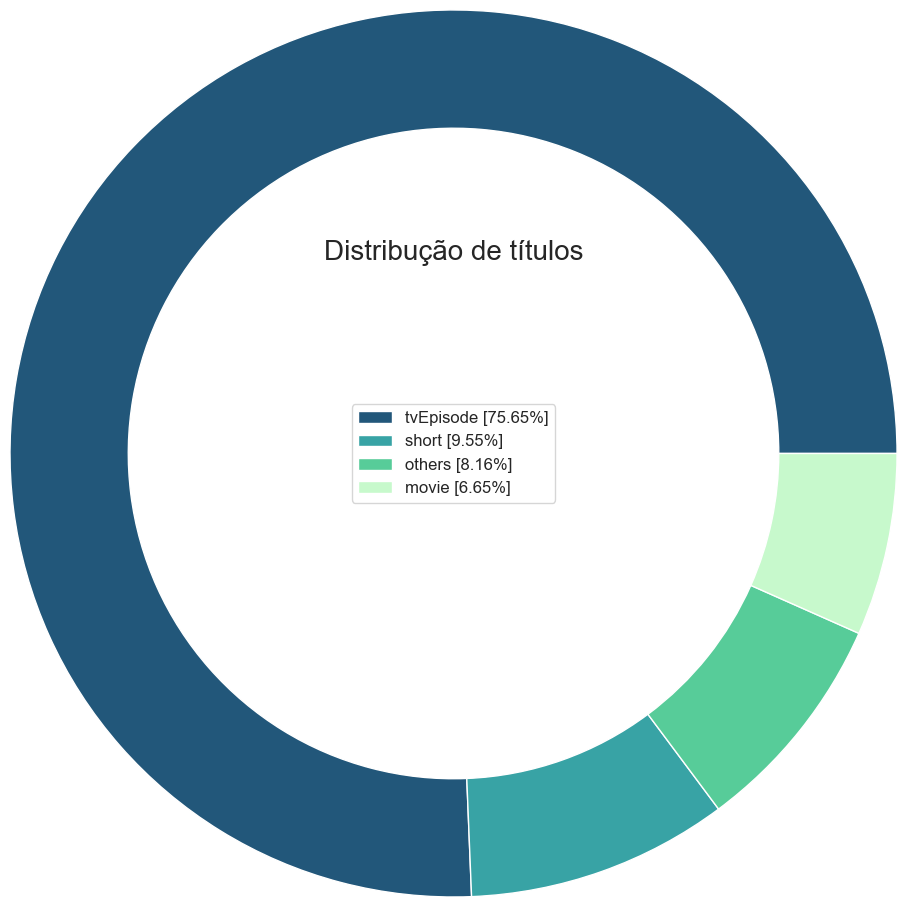

In [24]:
# Plot

# Mapa de cores
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
cs = cm.Set3(np.arange(100))

# Crio a figura
f = plt.figure()

# Pie Plot
colors = ['#22577A','#38A3A5','#57CC99','#C7F9CC']

plt.pie(resultado1['COUNT'], labeldistance = 1, radius = 3, colors = colors, wedgeprops = dict(width = 0.8))
plt.legend(labels = labels, loc = 'center', prop = {'size':12})
plt.title("Distribução de títulos", loc = 'Center', fontdict = {'fontsize':20, 'fontweight':20})
plt.show()

# 2- Qual o Número de Títulos Por Gênero?
Vamos calcular o número de filmes por gênero e entregar o resultado em valor percentual.

In [25]:
# Crio a consulta SQL
consulta2 = '''SELECT genres, COUNT(*) FROM titles WHERE type = 'movie' GROUP BY genres'''

In [26]:
# Resultado
resultado2 = pd.read_sql_query(consulta2, conn)

In [27]:
# Visualizo
display(resultado2)

,genres,COUNT(*)
0,None,71619
1,Action,14399
2,"Action,Adult",11
3,"Action,Adult,Adventure",2
4,"Action,Adult,Comedy",5
...,...,...
1467,"Thriller,War,Western",3
1468,"Thriller,Western",42
1469,War,1312
1470,"War,Western",15


In [28]:
# Converte as strings para minúsculo
resultado2['genres'] = resultado2['genres'].str.lower().values

In [29]:
# Remove valores NA (ausentes)
temp = resultado2['genres'].dropna()

In [30]:
# Vou criar um vector usando expressão regular para filtrar as strings
padrao = '(?u)\\b[\\w-]+\\b'
vector = CountVectorizer(token_pattern = padrao, analyzer = 'word').fit(temp)

In [31]:
# Visualizo
type(vector)

sklearn.feature_extraction.text.CountVectorizer

In [32]:
# aplico a vectorização ao dataset sem valores NA
bag_generos = vector.transform(temp)

In [33]:
type(bag_generos)

scipy.sparse._csr.csr_matrix

In [34]:
# Retorna gêneros únicos
generos_unicos = vector.get_feature_names()

In [35]:
# Crio o dataframe de gêneros
generos = pd.DataFrame(bag_generos.todense(), columns = generos_unicos, index = temp.index)

In [36]:
# Visualizo
generos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1471 entries, 1 to 1471
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   action        1471 non-null   int64
 1   adult         1471 non-null   int64
 2   adventure     1471 non-null   int64
 3   animation     1471 non-null   int64
 4   biography     1471 non-null   int64
 5   comedy        1471 non-null   int64
 6   crime         1471 non-null   int64
 7   documentary   1471 non-null   int64
 8   drama         1471 non-null   int64
 9   experimental  1471 non-null   int64
 10  family        1471 non-null   int64
 11  fantasy       1471 non-null   int64
 12  film-noir     1471 non-null   int64
 13  game-show     1471 non-null   int64
 14  history       1471 non-null   int64
 15  horror        1471 non-null   int64
 16  music         1471 non-null   int64
 17  musical       1471 non-null   int64
 18  mystery       1471 non-null   int64
 19  news          1471 non-null

In [37]:
# Drop da coluna n
#generos = generos.drop(columns = 'n', axis = 0)

In [38]:
# Calculo o percentual
generos_percentual = 100 * pd.Series(generos.sum()).sort_values(ascending = False) / generos.shape[0]

In [39]:
# Visualizo
generos_percentual.head(29)

drama           17.878994
comedy          16.859279
documentary     15.839565
adventure       14.547927
action          14.411965
romance         13.256288
crime           13.120326
mystery         12.372536
thriller        12.304555
fantasy         12.304555
horror          12.100612
sci-fi          11.284840
history         11.284840
family          11.216859
music           11.148878
animation       10.876954
biography       10.740993
musical         10.673012
war              9.177430
western          9.109449
sport            8.361659
adult            6.118287
news             3.263086
reality-tv       3.263086
film-noir        2.583277
short            1.495581
talk-show        1.291638
game-show        0.407886
experimental     0.067981
dtype: float64

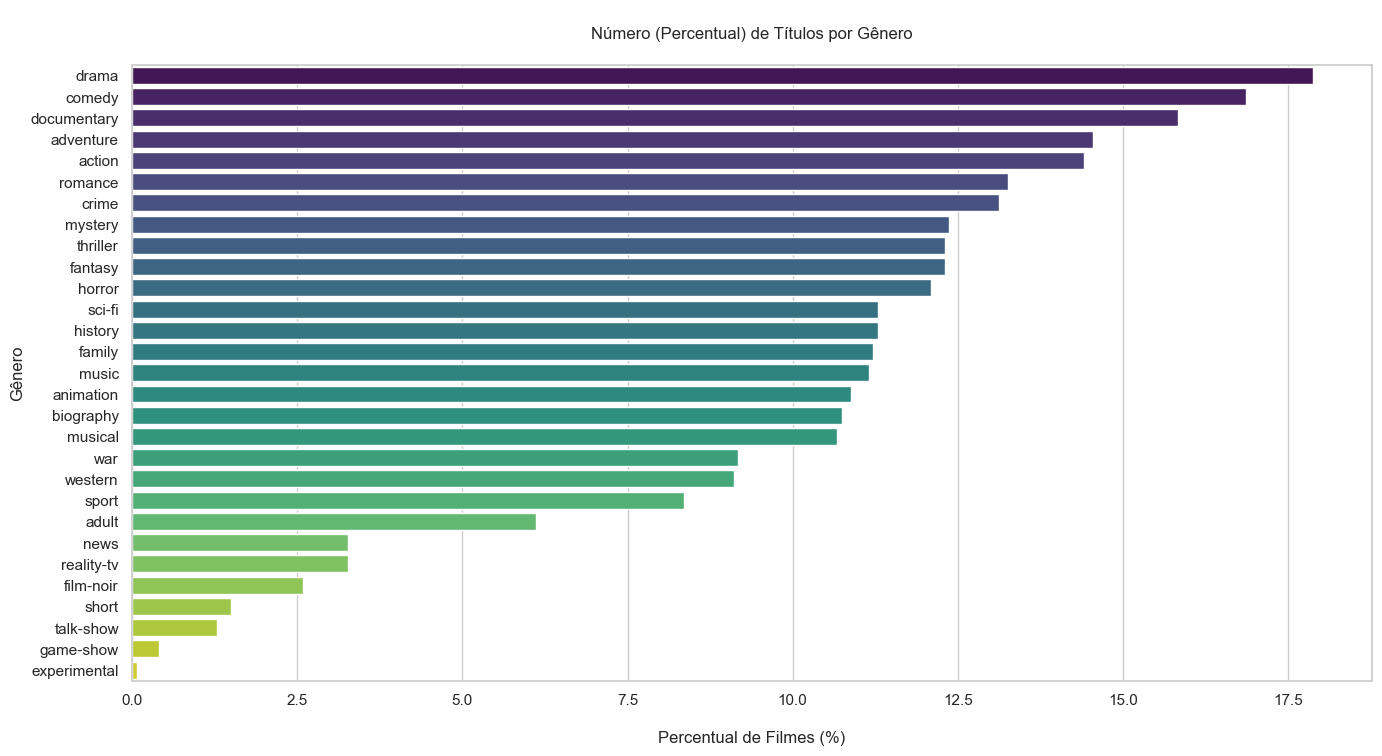

In [40]:
# Plot
plt.figure(figsize = (16,8))
sns.barplot(x = generos_percentual.values, y = generos_percentual.index, orient = "h", palette = "viridis")
plt.ylabel('Gênero')
plt.xlabel("\nPercentual de Filmes (%)")
plt.title('\nNúmero (Percentual) de Títulos por Gênero\n')
plt.show()

# 3- Qual a Mediana de Avaliação dos Filmes Por Gênero?
Mediana de avaliação dos filmes.

In [41]:
# Consulta SQL
consulta3 = '''
            SELECT rating, genres FROM
            ratings JOIN titles ON ratings.title_id = titles.title_id
            WHERE premiered <= 2022 AND type = 'movie'
            '''

In [42]:
# Resultado
resultado3 = pd.read_sql_query(consulta3, conn)

In [43]:
# Visualizo
display(resultado3)

,rating,genres
0,5.3,Romance
1,5.2,"Documentary,News,Sport"
2,4.2,None
3,6.0,"Action,Adventure,Biography"
4,4.4,Drama
...,...,...
284958,5.8,Thriller
284959,6.4,"Drama,History"
284960,3.8,"Adventure,History,War"
284961,8.3,Drama


In [44]:
# Crio uma função para retornar os gêneros
def retorna_generos(df):
    df['genres'] = df['genres'].str.lower().values
    temp = df['genres'].dropna()
    vetor = CountVectorizer(token_pattern = '(?u)\\b[\\w-]+\\b', analyzer = 'word').fit(temp)
    generos_unicos = vetor.get_feature_names()
    generos_unicos = [genre for genre in generos_unicos if len(genre) > 1]
    return generos_unicos

In [45]:
# Aplico a função
generos_unicos = retorna_generos(resultado3)

In [46]:
# Visualizo
generos_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [47]:
# Crio listas vazias
genero_counts = []
genero_ratings = []

In [48]:
# Loop
for item in generos_unicos:
    
    # Retorna a contagem de filmes por gênero
    consulta = 'SELECT COUNT(rating) FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_counts.append(resultado.values[0][0])
  
     # Retorna a avaliação de filmes por gênero
    consulta = 'SELECT rating FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_ratings.append(np.median(resultado['rating']))

In [49]:
# Preparo o dataframe final
df_genero_ratings = pd.DataFrame()
df_genero_ratings['genres'] = generos_unicos
df_genero_ratings['count'] = genero_counts
df_genero_ratings['rating'] = genero_ratings

In [50]:
# Visualizo
df_genero_ratings.head(20)

,genres,count,rating
0,action,29537,5.8
1,adult,4185,5.7
2,adventure,17922,6.0
3,animation,4933,6.6
4,biography,8810,7.0
5,comedy,70514,6.0
6,crime,24685,6.1
7,documentary,43436,7.3
8,drama,126627,6.4
9,family,11024,6.3


In [51]:
# Drop do índice 18 (news)
# Não quero essa info como gênero
df_genero_ratings = df_genero_ratings.drop(index = 18)

In [52]:
# Ordeno o resultado
df_genero_ratings = df_genero_ratings.sort_values(by = 'rating', ascending = False)

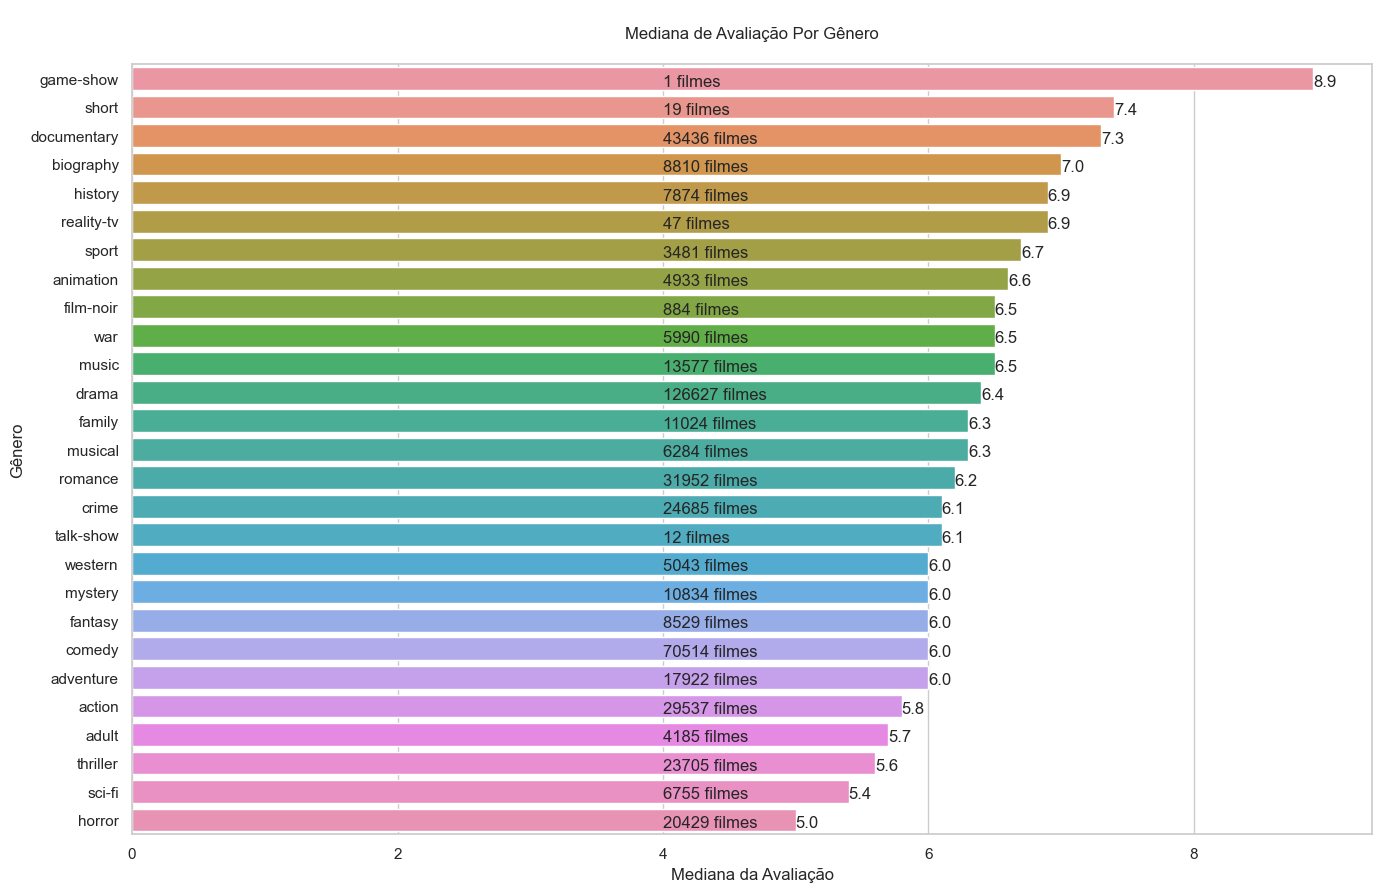

In [53]:
# Plot

# Figura
plt.figure(figsize = (16,10))

# Barplot
sns.barplot(y = df_genero_ratings.genres, x = df_genero_ratings.rating, orient = "h", )



# Textos do gráfico
for i in range(len(df_genero_ratings.index)):
    
    plt.text(4.0, 
             i + 0.25, 
             str(df_genero_ratings['count'][df_genero_ratings.index[i]]) + " filmes")
    
    plt.text(df_genero_ratings.rating[df_genero_ratings.index[i]],
             i + 0.25,
             round(df_genero_ratings["rating"][df_genero_ratings.index[i]],2))

plt.ylabel('Gênero')             
plt.xlabel('Mediana da Avaliação')
plt.title('\nMediana de Avaliação Por Gênero\n')
plt.show()

# 4- Qual a Mediana de Avaliação dos Filmes Em Relação ao Ano de Estréia?
Mediana de avaliação dos filmes.

In [54]:
# Consulta SQL
consulta4 = '''
            SELECT rating AS Rating, premiered FROM 
            ratings JOIN titles ON ratings.title_id = titles.title_id 
            WHERE premiered <= 2022 AND type = 'movie'
            ORDER BY premiered
            ''' 

In [55]:
# Resultado
resultado4 = pd.read_sql_query(consulta4, conn)

In [56]:
# Visualiza
display(resultado4)

,Rating,premiered
0,5.3,1894
1,5.2,1897
2,4.5,1897
3,3.9,1899
4,3.4,1899
...,...,...
284958,6.8,2022
284959,2.1,2022
284960,5.5,2022
284961,3.9,2022


In [57]:
# Calculo a mediana ao longo dos anos
ratings = []
for year in set(resultado4['premiered']):
    ratings.append(np.median(resultado4[resultado4['premiered'] == year]['Rating']))

In [58]:
type(ratings)

list

In [59]:
ratings[1:10]

[4.85, 3.65, 5.85, 4.3, 3.3, 5.25, 5.3, 4.300000000000001, 3.1]

In [60]:
# Lista de anos
anos = list(set(resultado4['premiered']))

In [61]:
anos[1:10]

[1897, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906]

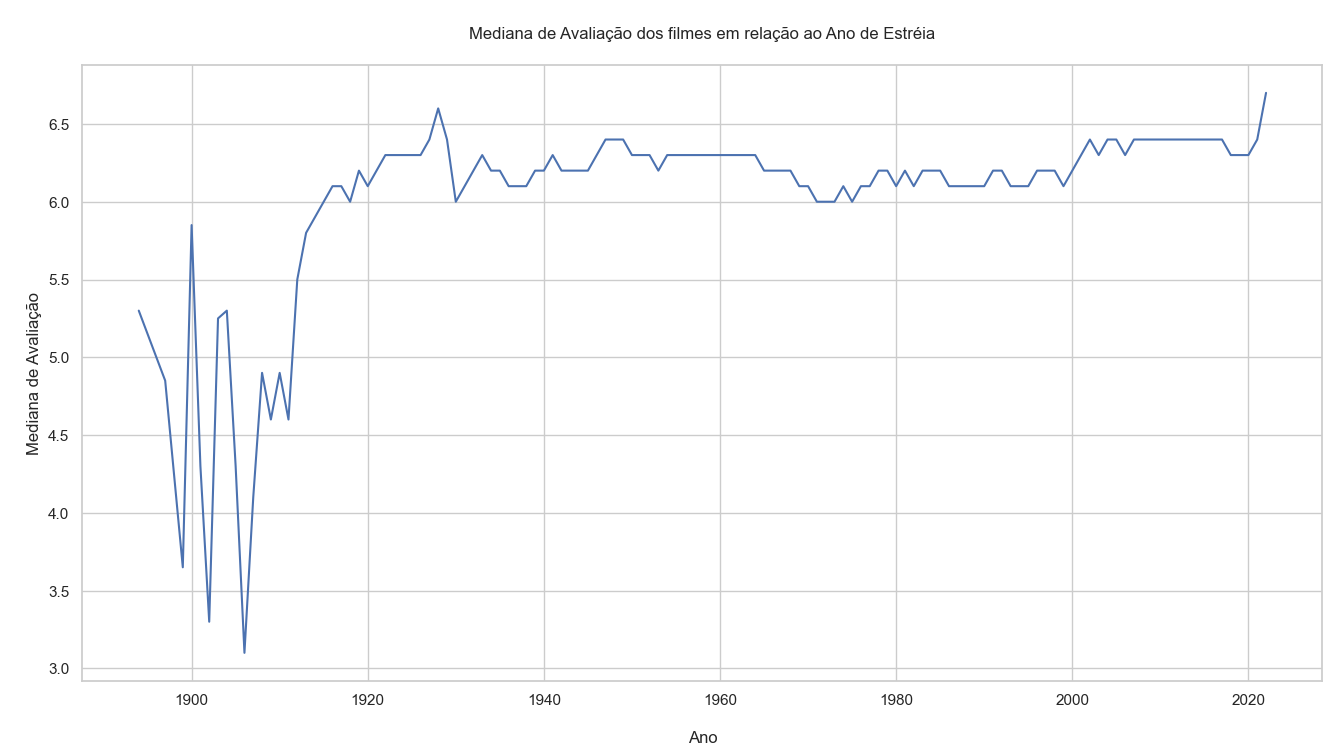

In [62]:
# Plot
plt.figure(figsize = (16,8))
plt.plot(anos, ratings)
plt.xlabel('\nAno')
plt.ylabel('\nMediana de Avaliação')
plt.title('\nMediana de Avaliação dos filmes em relação ao Ano de Estréia\n')
plt.show()

# 5- Qual o Número de Filmes Avaliados Por Gênero Em Relação ao Ano de Estréia?
Número de filmes por gênero. Vamos listar os Top 5.

In [63]:
# Consulta SQL
consulta5 = '''SELECT genres FROM titles '''

In [64]:
# Resultado
resultado5 = pd.read_sql_query(consulta5, conn)

In [65]:
display(resultado5)

,genres
0,"Documentary,Short"
1,"Animation,Short"
2,"Animation,Comedy,Romance"
3,"Animation,Short"
4,"Comedy,Short"
...,...
9498159,"Action,Drama,Family"
9498160,"Action,Drama,Family"
9498161,"Action,Drama,Family"
9498162,Short


In [66]:
# Retorna gêneros únicos
generos_unicos = retorna_generos(resultado5)

In [67]:
# Visualizo o resultado
generos_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'experimental',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [68]:
# Agora fazemos a contagem
genero_count = []
for item in generos_unicos:
    consulta = 'SELECT COUNT(*) COUNT FROM  titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND premiered <= 2022'
    resultado = pd.read_sql_query(consulta, conn)
    genero_count.append(resultado['COUNT'].values[0])

In [69]:
# Prepara o dataframe
df_genero_count = pd.DataFrame()
df_genero_count['genre'] = generos_unicos
df_genero_count['Count'] = genero_count

In [70]:
# Calcula os Top 5
df_genero_count = df_genero_count[df_genero_count['genre'] != 'n']
df_genero_count = df_genero_count.sort_values(by = 'Count', ascending = False)
top_generos = df_genero_count.head()['genre'].values

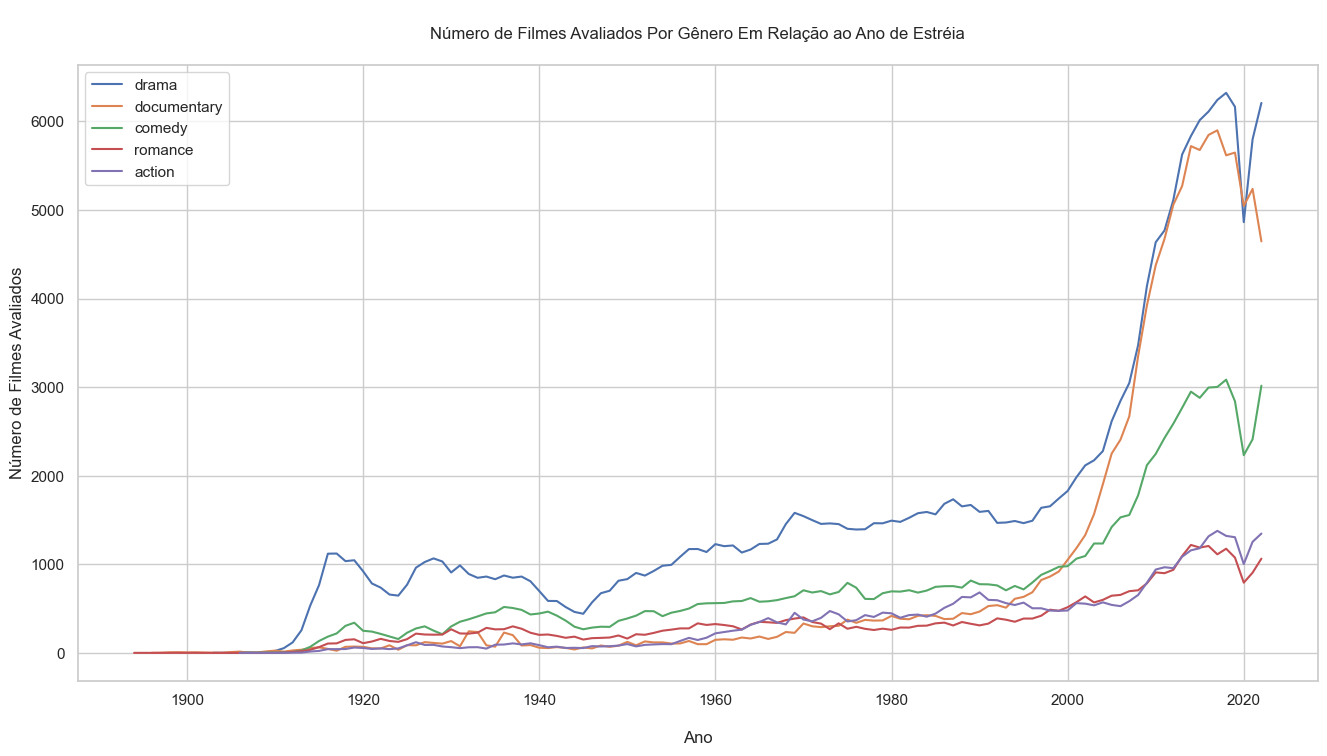

In [71]:
# Plot

#Figura
plt.figure(figsize = (16,8))

# Loop e Plot
for item in top_generos:
    consulta = 'SELECT COUNT(*) Number_of_movies, premiered Year FROM titles WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND Year <=2022 GROUP BY Year'
    resultado = pd.read_sql_query(consulta, conn)
    plt.plot(resultado['Year'], resultado['Number_of_movies'])
    
plt.xlabel('\nAno')
plt.ylabel('Número de Filmes Avaliados')
plt.title('\nNúmero de Filmes Avaliados Por Gênero Em Relação ao Ano de Estréia\n')
plt.legend(labels = top_generos)
plt.show()

# 6- Qual o Filme Com Maior Tempo de Duração? Calcule os Percentis.
Percentis e filme mais longo da história.

In [72]:
# Consulta SQL
consulta6 = '''
            SELECT runtime_minutes Runtime
            FROM titles
            WHERE type = 'movie' AND Runtime != 'NaN'
            '''

In [73]:
# Resultado
resultado6 = pd.read_sql_query(consulta6, conn)

In [74]:
display(resultado6)

,Runtime
0,45
1,100
2,100
3,70
4,90
...,...
398607,123
398608,57
398609,100
398610,116


In [75]:
# Loop para cálculo dos percentis
for i in range(101): 
    val = i
    perc = round(np.percentile(resultado6['Runtime'].values, val), 2)
    print('{} percentil da duração (runtime) é: {}'.format(val, perc))

0 percentil da duração (runtime) é: 1.0
1 percentil da duração (runtime) é: 45.0
2 percentil da duração (runtime) é: 47.0
3 percentil da duração (runtime) é: 49.0
4 percentil da duração (runtime) é: 50.0
5 percentil da duração (runtime) é: 50.0
6 percentil da duração (runtime) é: 52.0
7 percentil da duração (runtime) é: 53.0
8 percentil da duração (runtime) é: 54.0
9 percentil da duração (runtime) é: 56.0
10 percentil da duração (runtime) é: 57.0
11 percentil da duração (runtime) é: 58.0
12 percentil da duração (runtime) é: 60.0
13 percentil da duração (runtime) é: 60.0
14 percentil da duração (runtime) é: 60.0
15 percentil da duração (runtime) é: 61.0
16 percentil da duração (runtime) é: 62.0
17 percentil da duração (runtime) é: 64.0
18 percentil da duração (runtime) é: 65.0
19 percentil da duração (runtime) é: 67.0
20 percentil da duração (runtime) é: 68.0
21 percentil da duração (runtime) é: 70.0
22 percentil da duração (runtime) é: 70.0
23 percentil da duração (runtime) é: 71.0
24 

In [76]:
# Refazendo a consulta e retornando o folme com maior duração
consulta6 = '''
            SELECT runtime_minutes Runtime, original_title
            FROM titles
            WHERE type = 'movie' AND Runtime != 'NaN'
            ORDER BY Runtime DESC
            LIMIT 1
            '''

In [77]:
resultado6 = pd.read_sql_query(consulta6, conn)

In [78]:
resultado6

,Runtime,original_title
0,59460,100


'Logistics (100)' é o filme mais longo da história (até este momento), com 857 horas (51420 minutos). Dirigido por Daniel Andersson e Erika Magnusson, o filme acompanha todo o ciclo de vida de um pedômetro (dispositivo de rastreamento de passos) em ordem cronológica reversa.

# 7- Qual a Relação Entre Duração e Gênero?
Relação entre duração do filme e gênero.

In [79]:
# Consulta SQL
consulta7 = '''
            SELECT AVG(runtime_minutes) Runtime, genres
            FROM titles
            WHERE type = 'movie'
            AND runtime_minutes != 'NaN'
            GROUP BY genres
            '''

In [80]:
# Resultado
resultado7 = pd.read_sql_query(consulta7, conn)

In [81]:
# Retorna gêneros únicos
generos_unicos = retorna_generos(resultado7)

In [82]:
# Visualiza
generos_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [83]:
# Calculo duração por gênero
genero_runtime = []
for item in generos_unicos:
    consulta = 'SELECT runtime_minutes Runtime FROM titles WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND Runtime!=\'NaN\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_runtime.append(np.median(resultado['Runtime']))

In [84]:
# Prepara o dataframe
df_genero_runtime = pd.DataFrame()
df_genero_runtime['genre'] = generos_unicos
df_genero_runtime['runtime'] = genero_runtime

In [85]:
# Remove índice 18 (news)
df_genero_runtime = df_genero_runtime.drop(index = 18)

In [86]:
# Ordena os dados
df_genero_runtime = df_genero_runtime.sort_values(by = 'runtime', ascending = False)

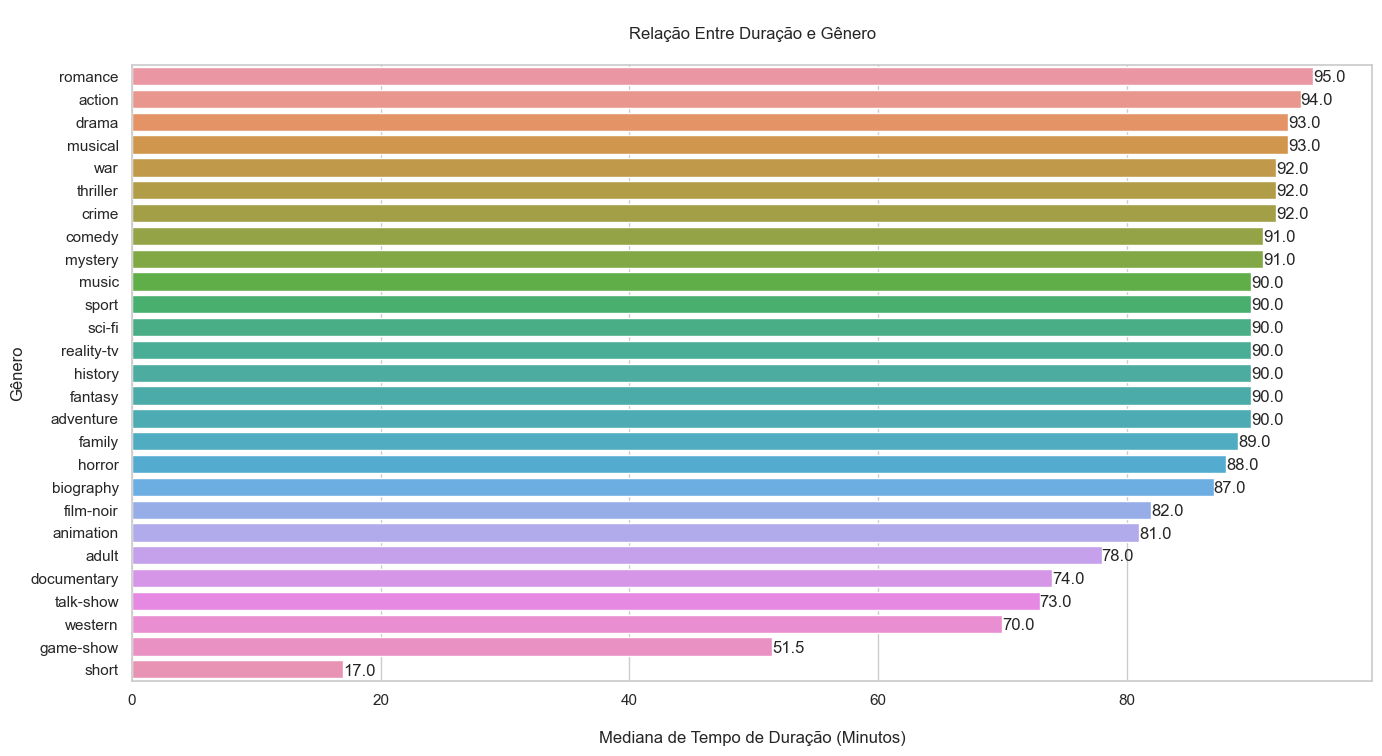

In [87]:
# Plot

#Tamanho da figura
plt.figure(figsize = (16,8))

# Barplot
sns.barplot(y = df_genero_runtime.genre, x = df_genero_runtime.runtime, orient = "h")

# Loop
for i in range(len(df_genero_runtime.index)):
    plt.text(df_genero_runtime.runtime[df_genero_runtime.index[i]],
             i + 0.25,
             round(df_genero_runtime["runtime"][df_genero_runtime.index[i]], 2))

plt.ylabel('Gênero')             
plt.xlabel('\nMediana de Tempo de Duração (Minutos)')
plt.title('\nRelação Entre Duração e Gênero\n')
plt.show()

# 8- Qual o Número de Filmes Produzidos Por País?
Número de filmes produzidos por país.

In [88]:
# Consulta SQL
consulta8 = '''
            SELECT region, COUNT(*) Number_of_movies FROM
            akas JOIN titles ON
            akas.title_id = titles.title_id
            WHERE region != 'None'
            AND type = \'movie'\
            GROUP BY region
            '''

In [89]:
# Resultado
resultado8 = pd.read_sql_query(consulta8, conn)

In [90]:
display(resultado8)

,region,Number_of_movies
0,AD,22
1,AE,8828
2,AF,112
3,AG,12
4,AL,1311
...,...,...
230,YUCS,152
231,ZA,13039
232,ZM,47
233,ZRCD,2


In [91]:
# Shape
resultado8.shape

(235, 2)

In [92]:
# Número de líneas
resultado8.shape[0]

235

In [93]:
# Listas auxiliares
nomes_paises = []
contagem = []

In [94]:
# Loop para obter o país de acordo com a região
for i in range(resultado8.shape[0]):
    try:
        coun = resultado8['region'].values[i]
        nomes_paises.append(pycountry.countries.get(alpha_2 = coun).name)
        contagem.append(resultado8['Number_of_movies'].values[i])
    except: 
        continue

In [95]:
# Preparo o dataframe
df_filmes_paises = pd.DataFrame()
df_filmes_paises['country'] = nomes_paises
df_filmes_paises['Movie_Count'] = contagem

In [96]:
# Ordeno o resultado
df_filmes_paises = df_filmes_paises.sort_values(by = 'Movie_Count', ascending = False)

In [97]:
# Visualizo
df_filmes_paises.head(10)

,country,Movie_Count
200,United States,323168
66,United Kingdom,163556
97,Japan,95350
90,India,92981
64,France,88090
32,Canada,85137
48,Germany,76188
59,Spain,68756
94,Italy,68348
26,Brazil,67516


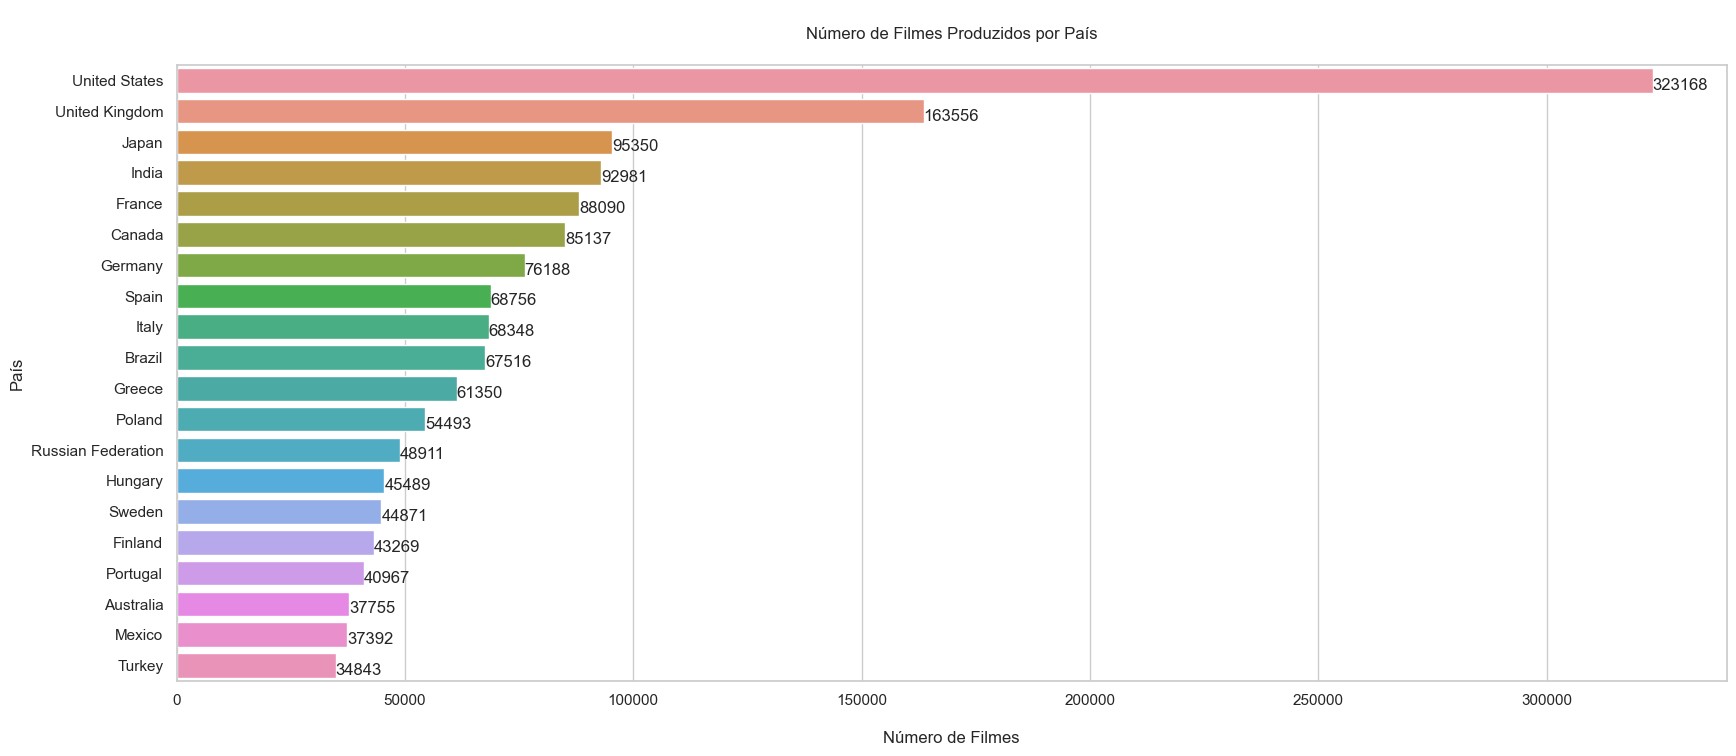

In [98]:
# Plot

# Figura
plt.figure(figsize = (20,8))

# Barplot
sns.barplot(y = df_filmes_paises[:20].country, x = df_filmes_paises[:20].Movie_Count, orient = "h")

# Loop
for i in range(0,20):
    plt.text(df_filmes_paises.Movie_Count[df_filmes_paises.index[i]]-1,
            i + 0.30,
            round(df_filmes_paises["Movie_Count"][df_filmes_paises.index[i]],2))

plt.ylabel('País')
plt.xlabel('\nNúmero de Filmes')
plt.title('\nNúmero de Filmes Produzidos por País\n')
plt.show()

# 9- Quais São os Top 10 Melhores Filmes?
Top 10 filmes com melhor avaliação e mais de 25 mil votos.

In [99]:
# Consulta SQL
consulta9 = '''
            SELECT primary_title AS Movie_Name, genres, rating
            FROM 
            titles JOIN ratings
            ON  titles.title_id = ratings.title_id
            WHERE titles.type = 'movie' AND ratings.votes >= 25000
            ORDER BY rating DESC
            LIMIT 10          
            ''' 

In [100]:
# Resultado
top10_melhores_filmes = pd.read_sql_query(consulta9, conn)

In [101]:
display(top10_melhores_filmes)

,Movie_Name,genres,rating
0,The Shawshank Redemption,Drama,9.3
1,The Godfather,"Crime,Drama",9.2
2,The Chaos Class,"Comedy,Drama",9.2
3,CM101MMXI Fundamentals,"Comedy,Documentary",9.1
4,12 Angry Men,"Crime,Drama",9.0
5,The Godfather Part II,"Crime,Drama",9.0
6,Schindler's List,"Biography,Drama,History",9.0
7,The Lord of the Rings: The Return of the King,"Action,Adventure,Drama",9.0
8,The Dark Knight,"Action,Crime,Drama",9.0
9,Mirror Game,"Crime,Mystery,Thriller",9.0


# 10- Quais São os Top 10 Piores Filmes?
Top 10 filmes com pior avaliação e mais de 25 mil votos.

In [102]:
# Consulta SQL
consulta10 = '''
            SELECT primary_title AS Movie_Name, genres, rating
            FROM 
            titles JOIN ratings
            ON  titles.title_id = ratings.title_id
            WHERE titles.type = 'movie' AND ratings.votes >= 25000
            ORDER BY rating ASC
            LIMIT 10
            ''' 

In [103]:
# Resultado
top10_piores_filmes = pd.read_sql_query(consulta10, conn)

In [104]:
display(top10_piores_filmes)

,Movie_Name,genres,rating
0,Reis,"Biography,Drama",1.0
1,Cumali Ceber,Comedy,1.0
2,Sadak 2,"Action,Drama",1.1
3,Smolensk,"Drama,Thriller",1.2
4,Superbabies: Baby Geniuses 2,"Comedy,Family,Sci-Fi",1.5
5,The Cost of Deception,"Action,Crime,Drama",1.5
6,Manos: The Hands of Fate,Horror,1.6
7,Justin Bieber: Never Say Never,"Documentary,Music",1.6
8,Code Name: K.O.Z.,"Crime,Mystery",1.7
9,From Justin to Kelly,"Comedy,Musical,Romance",1.9


# Fim